# Understanding the data and visualisation
When given data to analyse you will not always be told all the detials about being how it was collected and how the format is showing us the data collected. 
Also being able to analyse data usually means that we need to visualise the data and try and find the relationships between data or contrasts that might be in the data. 

In [2]:
#Start by importing the modules needed for data manipulation and for data visualisation

#Add the config file to this to this to make the 

import pandas as pd 
from matplotlib import pyplot as plt


#Want to run off your machine - without internet connection 
#data = pd.read_csv('Data/titanic.csv')

#Can only be run with an internet connection 
data = pd.read_csv('https://raw.githubusercontent.com/chroadhouse/Futureme/main/Data/titanic.csv')

#Run the code to make sure the data is read into the file 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Not Survive,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Not Survive,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


One of the first things to do when working with data is work out what type the data is being displayed - between quantitative and qualitative. But with python there is another step within this where you must look at what the data type is since different data types behave differently and could effect the way we analyse

In [3]:
#The .info() does give us the data types for the different columns of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
#If you don't want to check on all the columns of data you can check one column individually by: 
data['Age'].dtype

dtype('float64')

One of the things that should be checked when working with data is looking at what values are missing. 
* .isna() - is a method that will tell you you how many NaN's there are, which stands for NaN. 

The reason this is performed is form the .info() method which tells us that both agem cabin and embarked are missing values. 

In [5]:
#The isna() method will return whether or not the data is NaN
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#By running the sum method on this data, it will give us the frequency of NaN's in the data set
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:title={'center':'Bar chart to show the number of valid data in each column'}, xlabel='Columns', ylabel='Number of data'>

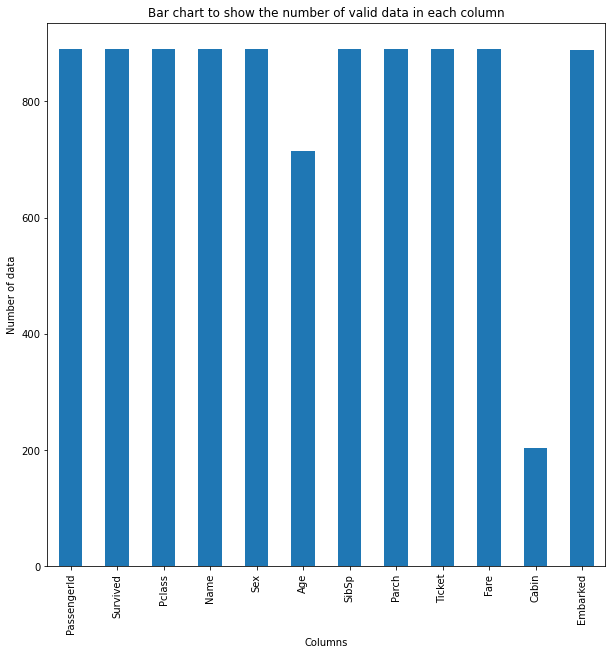

In [7]:
#The ~ is the character that inverses the isna() method that 
temp1 = ~data.isna()
plt.figure(figsize=(10,10))
plt.xlabel('Columns')
plt.ylabel('Number of data')
plt.title('Bar chart to show the number of valid data in each column')
temp1.sum().plot(kind='bar')

#This is bar chart shows the data that is valid - we can see this sort of data in the .info() but this is a more graphical representation

# Plotting Data 
Plotting data is one of the best ways to get a grasp of what the data is telling and showing us. 

To plot daya in python we use the matplotlib library which makes plotting data very easy. 

The Documentation can be found here for this module: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

//Talk about the different graphs and what they are all used for as well aas the different ways we can make them in matplot lab

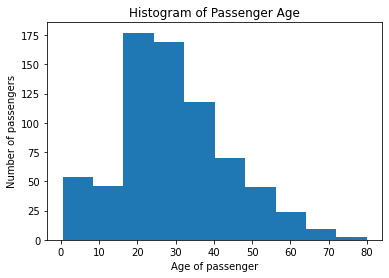

In [8]:
plt.hist(data['Age'])
plt.xlabel('Age of passenger')
plt.ylabel('Number of passengers')
plt.title('Histogram of Passenger Age')
plt.show()

<AxesSubplot:title={'center':'Pie chart to show the number of males and females'}, ylabel='Sex'>

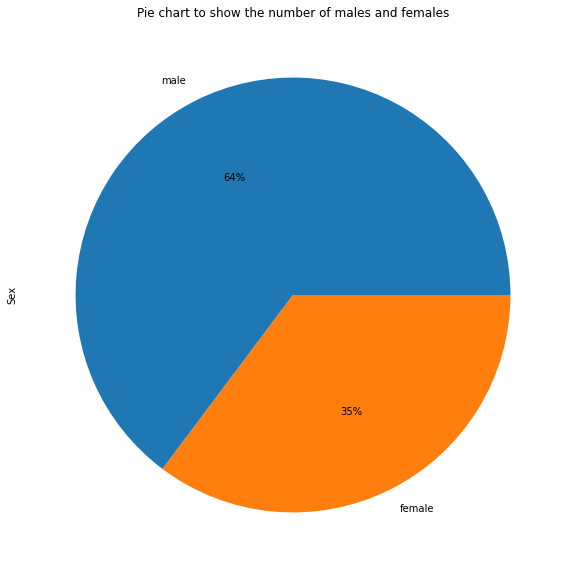

In [9]:
#make a simple pie chart here for the number of males compared to females 
plt.figure(figsize=(10,10))
data.Sex.value_counts().plot(kind='pie', title='Pie chart to show the number of males and females', autopct='%d%%')

Text(0, 0.5, 'Number of passengers')

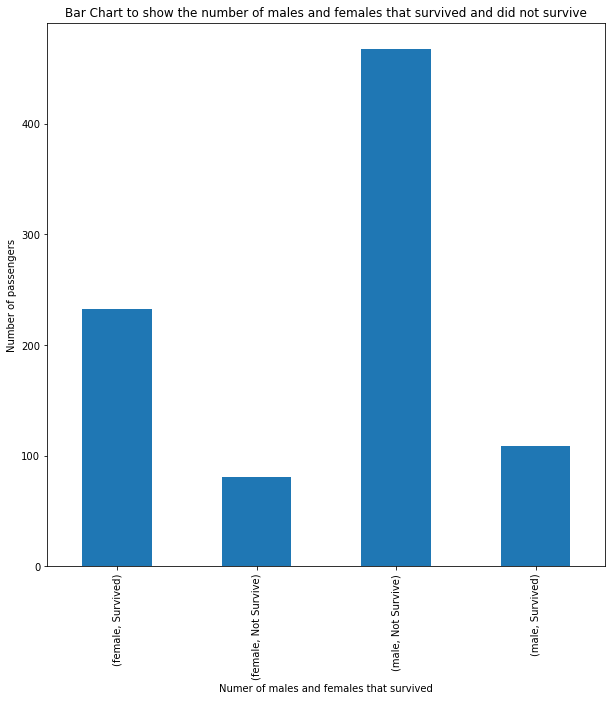

In [10]:
plt.figure(figsize=(10,10))
data.groupby('Sex').Survived.value_counts().plot(kind='bar')
plt.title('Bar Chart to show the number of males and females that survived and did not survive')
plt.xlabel('Numer of males and females that survived')
plt.ylabel('Number of passengers')

<AxesSubplot:title={'center':'People who survived'}, ylabel='Frequency'>

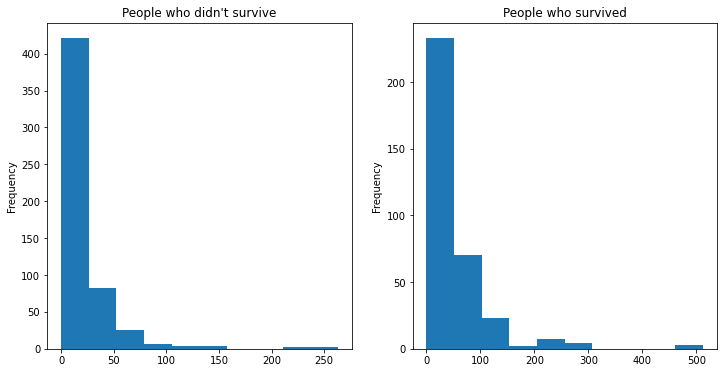

In [11]:
#Some thoughts on what to do in this bit here 
not_survived_fare = data['Fare'][data['Survived']=='Not Survive']
survived_fare = data['Fare'][data['Survived']=='Survived']
plt.figure(figsize=(12,6))
plt.subplot(121)
not_survived_fare.plot(kind='hist',title = 'People who didn\'t survive')


plt.subplot(122)
survived_fare.plot(kind='hist', title= 'People who survived')


<AxesSubplot:title={'center':'people who survived'}, ylabel='Pclass'>

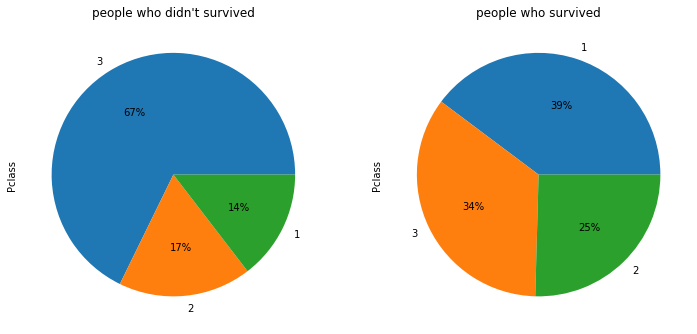

In [13]:
not_survived_class = data['Pclass'][data['Survived']=='Not Survive']
survived_class = data['Pclass'][data['Survived']=='Survived']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
not_survived_class.value_counts().plot(kind='pie', title='people who didn\'t survived', autopct='%d%%')

plt.subplot(1,2,2)
survived_class.value_counts().plot(kind='pie', title='people who survived', autopct='%d%%')

# Customising your charts 
From the above examples you have seen how to add a titile, x and y axis label. We can do more than that with our graphs to make them suit our needs 
